In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

# Import the relevant modules
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.synthesize.rollout_generator as rg
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [2]:
# cohort = "initial"
cohort = "circus2"

# data_method = "eval_single"
# data_method = "data_alpha"
data_method = "data_beta"
eval_method = "eval_nominal"

scene = "button1"

courses = [
    "button_press"
    ]   

roster = [
    "Maverick",
    "Rooster"
    ]

# deployment = (cohort,courses[0],scene,eval_method)
deployment = (cohort,courses[0],scene,"eval_nominal")

In [ ]:
# Generate Rollout Data
rg.generate_rollout_data(cohort,courses,scene,data_method)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

======================================================================
Cohort : circus2                Network: histNet
======================================================================
----------------------------------------------------------------------
Student: Maverick   | Epochs: 200   | Data Size: 12288.0/1600.0               
Time: 0h 3m 13s     | Train: 0.7471 | Test: 0.9607
----------------------------------------------------------------------
Student: Rooster    | Epochs: 200   | Data Size: 12288.0/1600.0               
Time: 0h 3m 13s     | Train: 0.6673 | Test: 0.8766
======================================================================

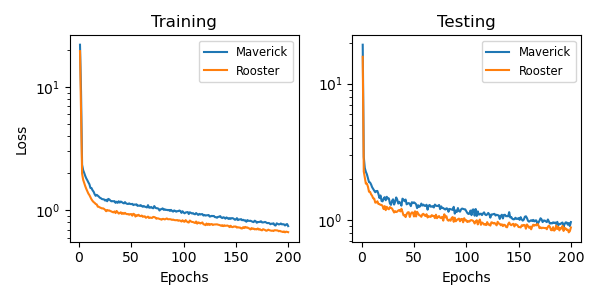

In [3]:
# # Train the Policy
# tp.train_roster(cohort,roster,"histNet",200)

pl.plot_losses(cohort,roster,"histNet",use_log=True)

======================================================================
Cohort : circus2                Network: commNet
======================================================================
----------------------------------------------------------------------
Student: Maverick   | Epochs: 500   | Data Size: 12288.0/1600.0               
Time: 0h 52m 42s    | Train: 0.0023 | Test: 0.0120
----------------------------------------------------------------------
Student: Rooster    | Epochs: 500   | Data Size: 12288.0/1600.0               
Time: 0h 26m 27s    | Train: 0.0019 | Test: 0.0448
======================================================================

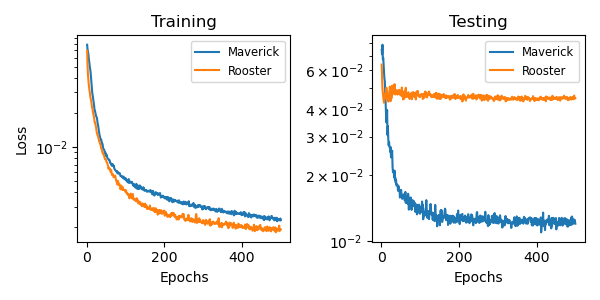

In [4]:
# # Train the Policy
# tp.train_roster(cohort,roster,"commNet",300,regen=True)
# # tp.train_roster(cohort,roster,"commNet",500,deploy,lim_sv=50)
# # tp.train_roster(cohort,roster,"commNet",300,regen=True,deployment=deployment,lim_sv=50)
# # tp.train_roster(cohort,roster,"commNet",300,lim_sv=50)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

Plotting trajectories for expert...

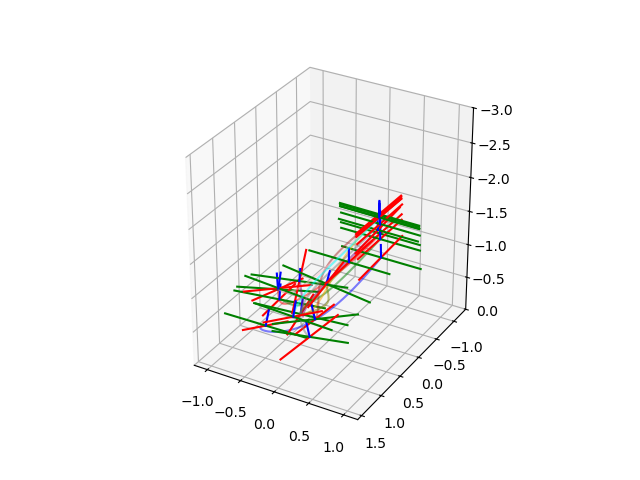

Plotting trajectories for Maverick...

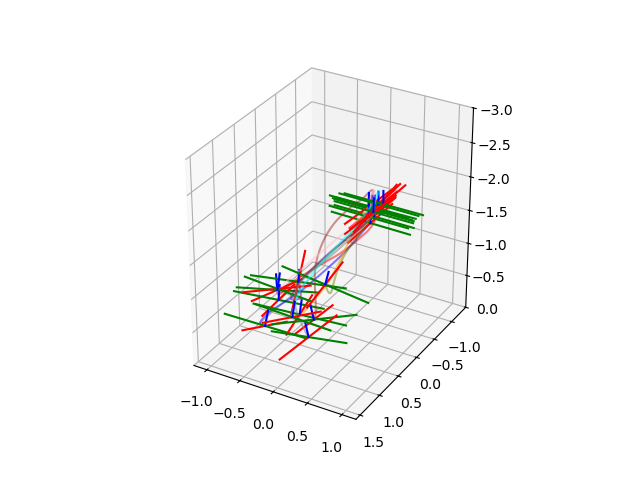

Plotting trajectories for Rooster...

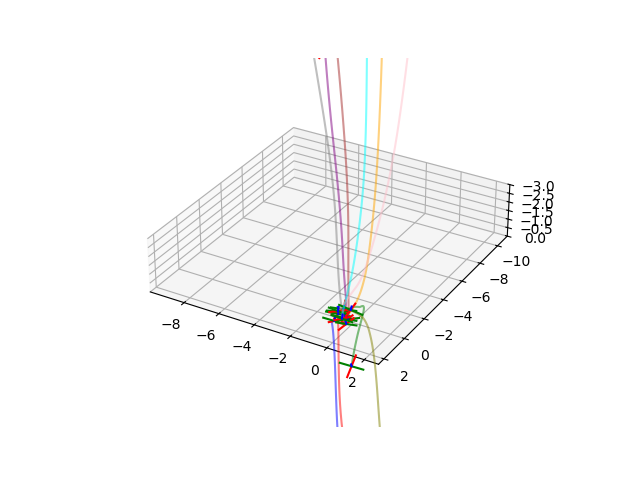

                      Deployment Summary                      
┏━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot    ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert   │   0.48   │   0.20   │ 0.64 │  2.35   │   2.27   │
│ Maverick │   0.66   │   0.31   │ 0.28 │  8.63   │   8.49   │
│ Rooster  │   5.43   │   1.53   │ 0.03 │  2.66   │   2.64   │
└──────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [5]:
# Simulate in FiGS
for course in courses:
    # df.deploy_roster(cohort,deployment,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)